C:\Users\mcaeiro\AppData\Local\Temp\ipykernel_40904\3192467287.py:53: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


File with the best mean visibility probability: ad-il.pkl
Mean visibility probability: 0.5027255822775458
File with the best mean presence probability: ad-il.pkl
Mean presence probability: 0.4952166649680567


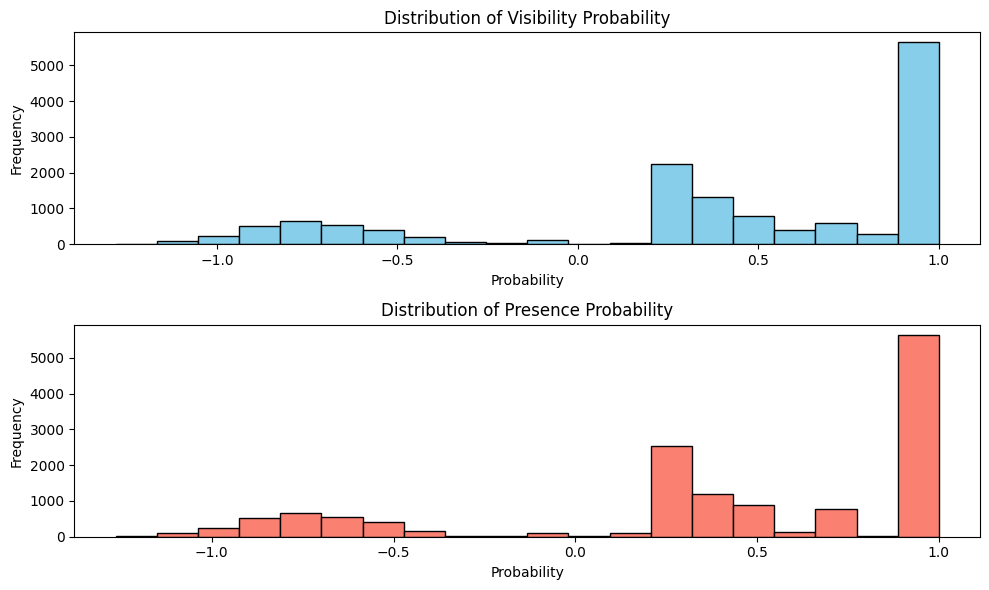

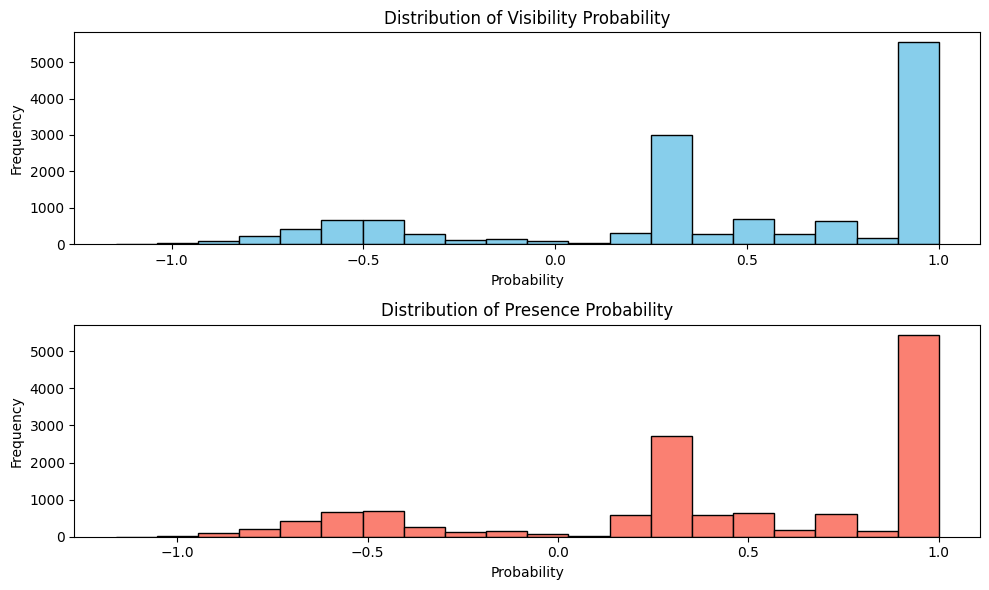

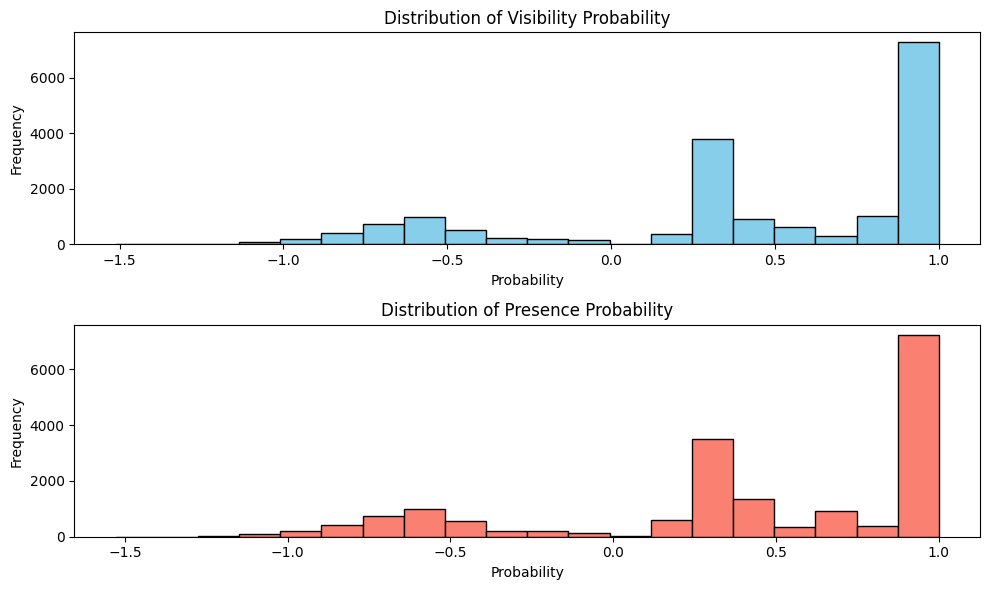

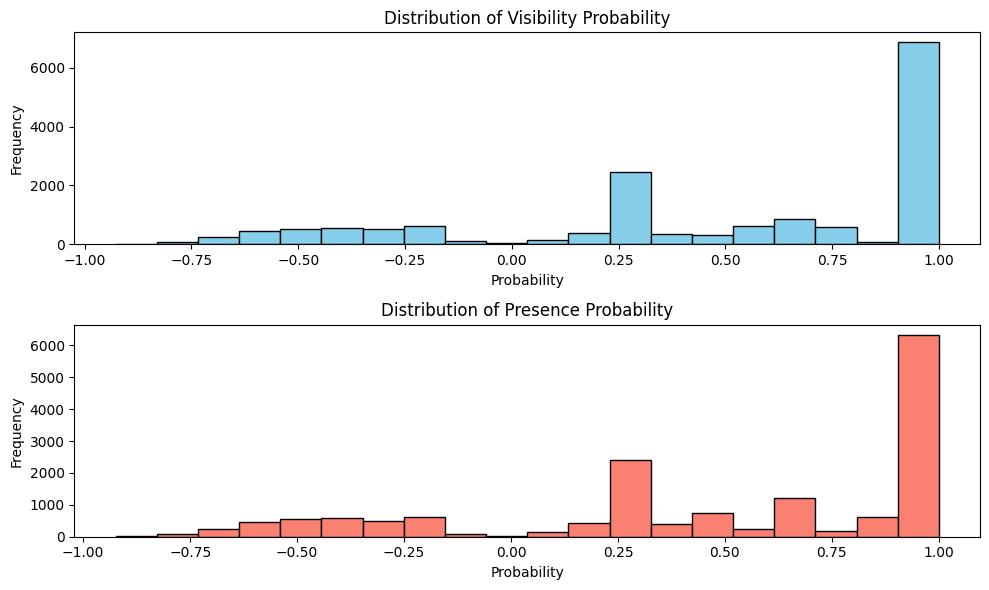

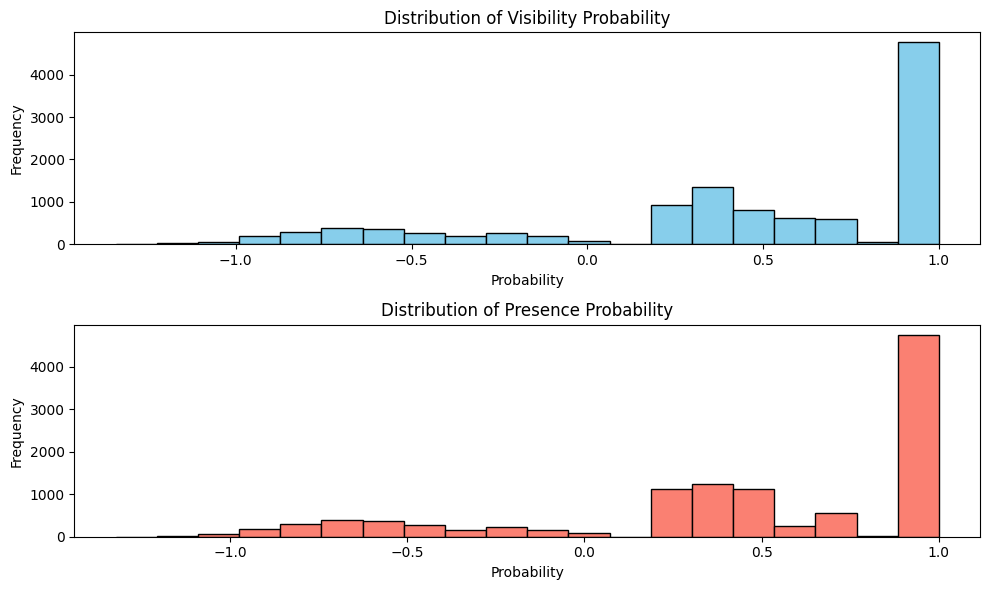

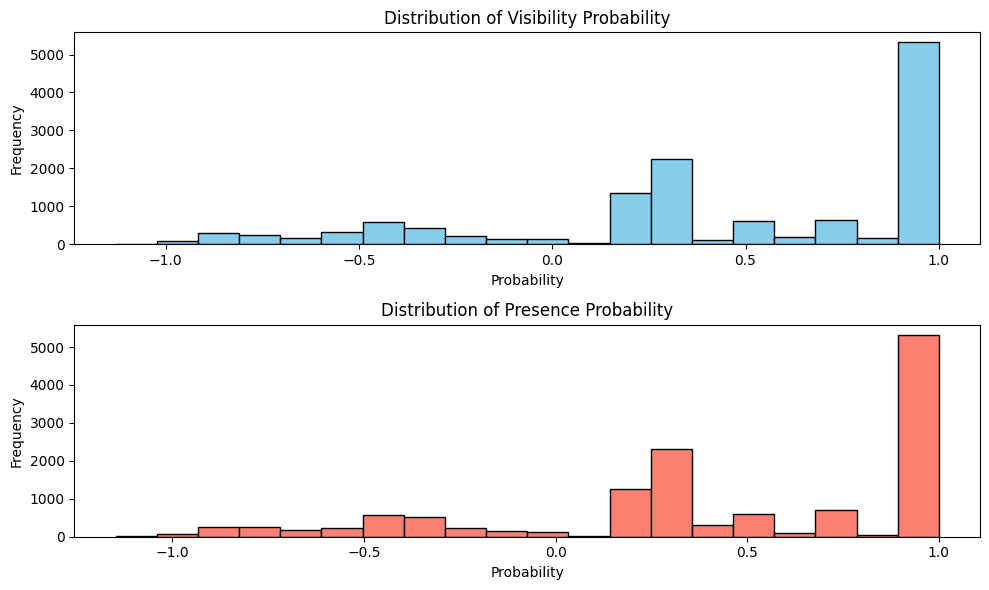

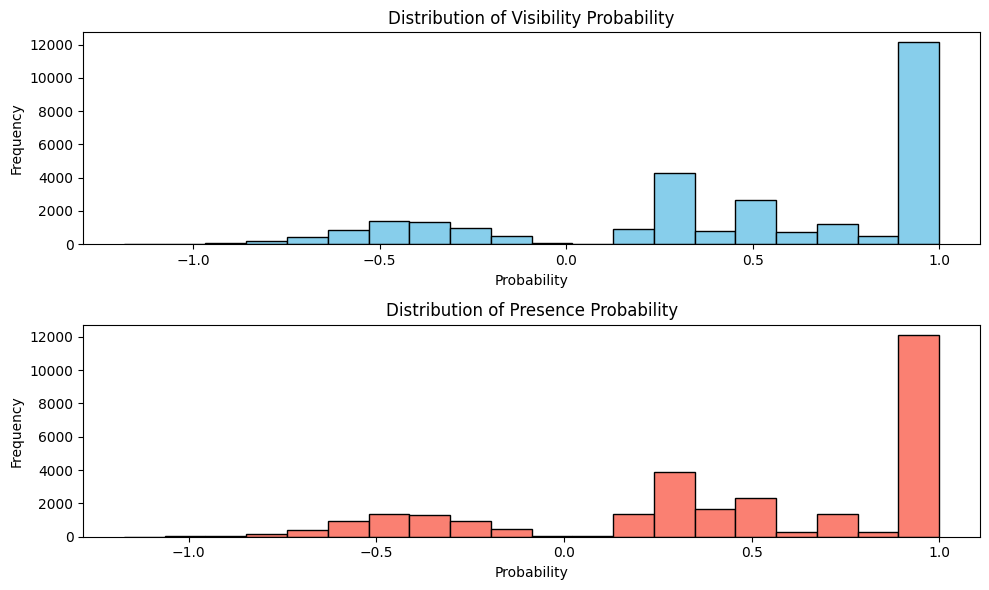

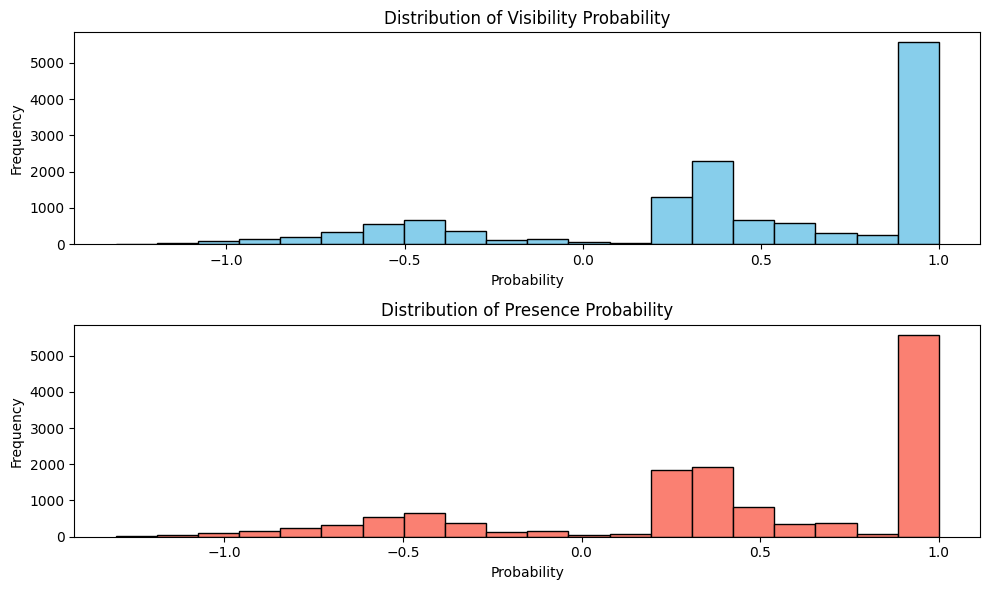

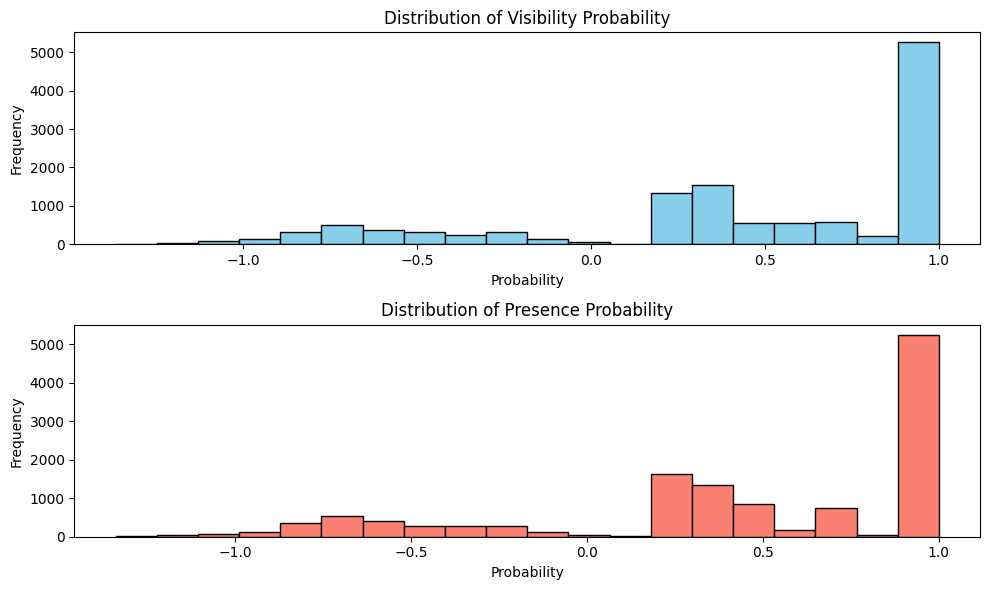

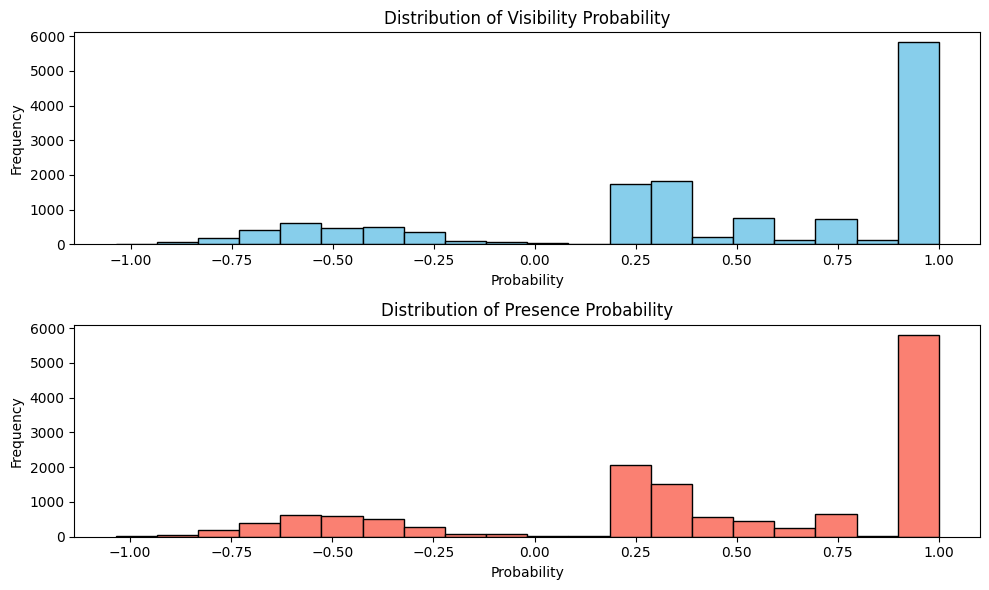

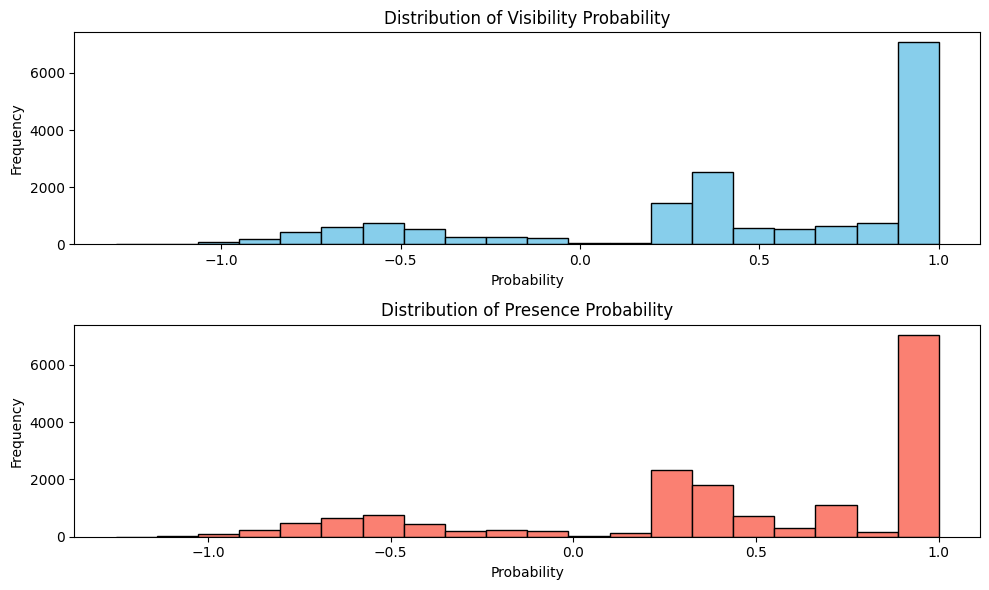

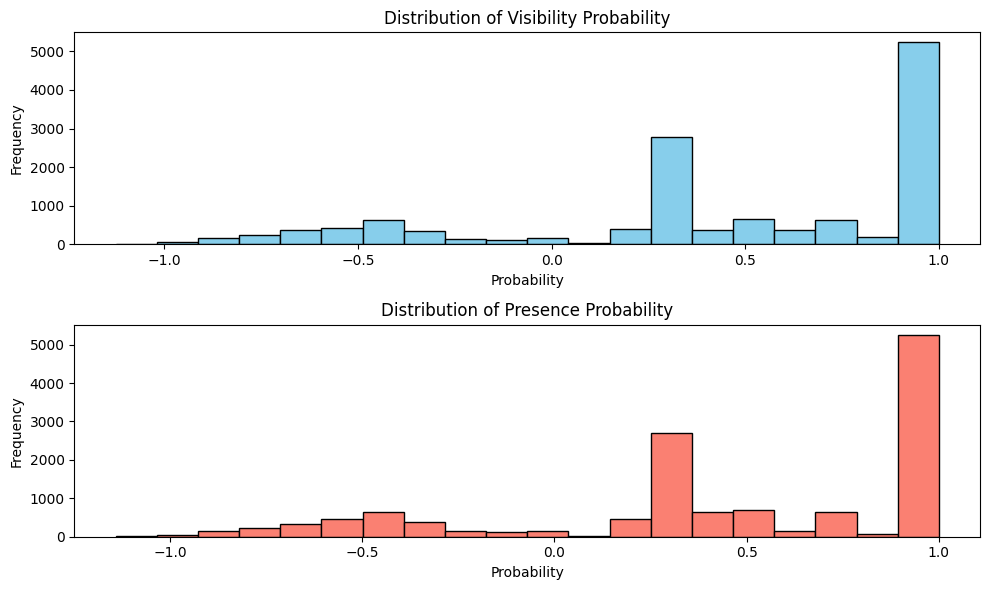

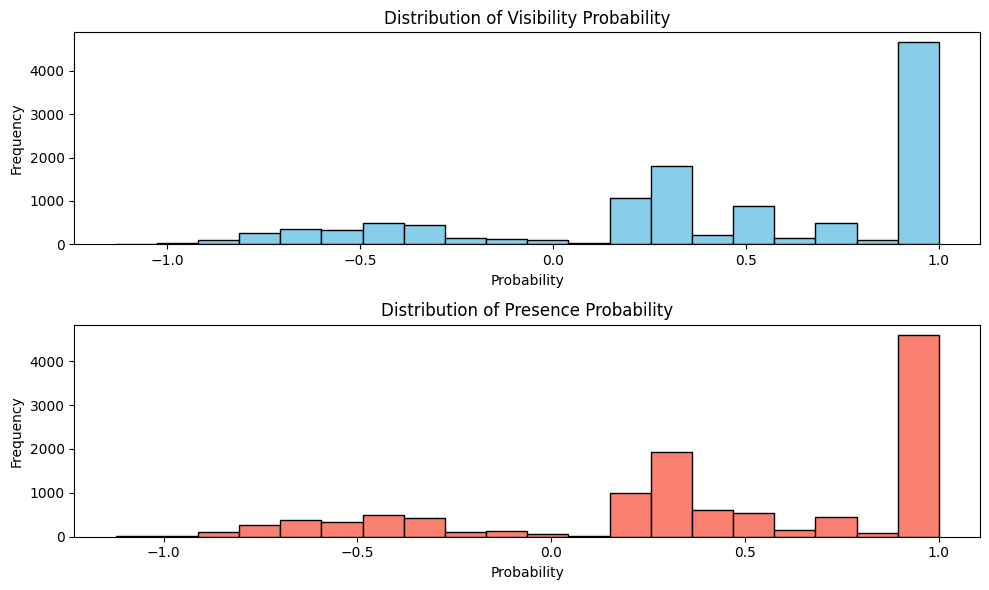

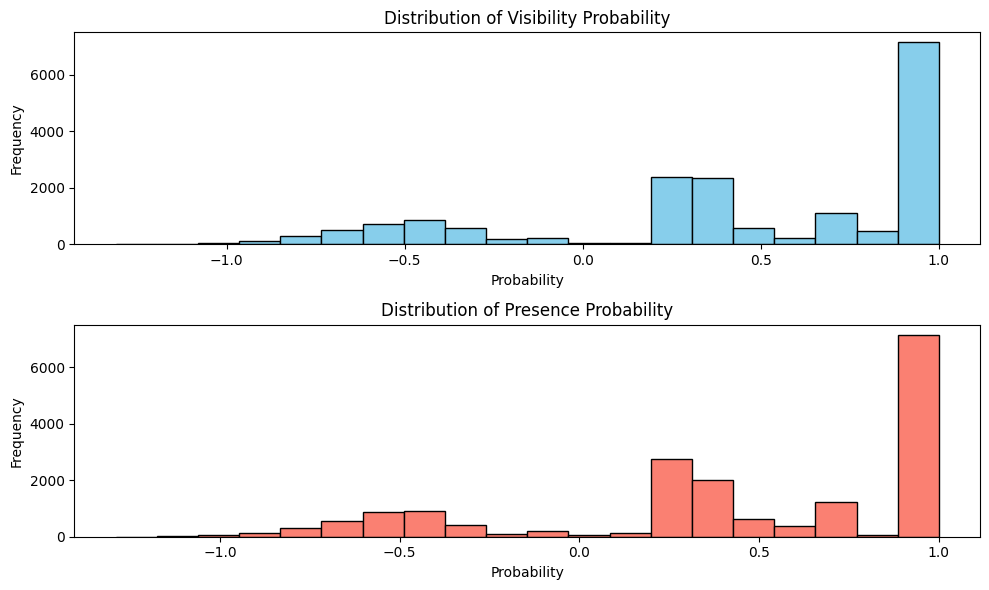

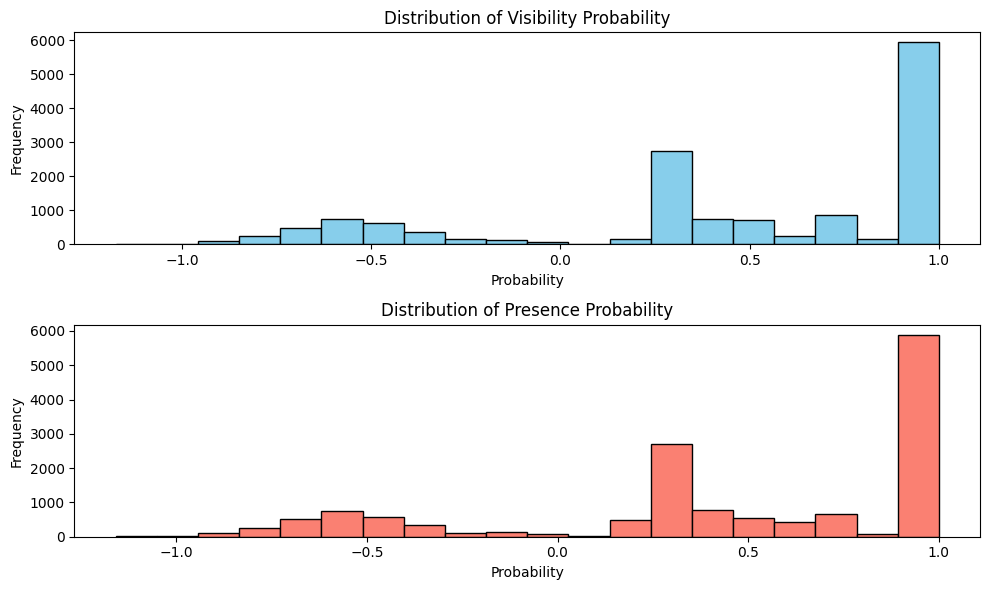

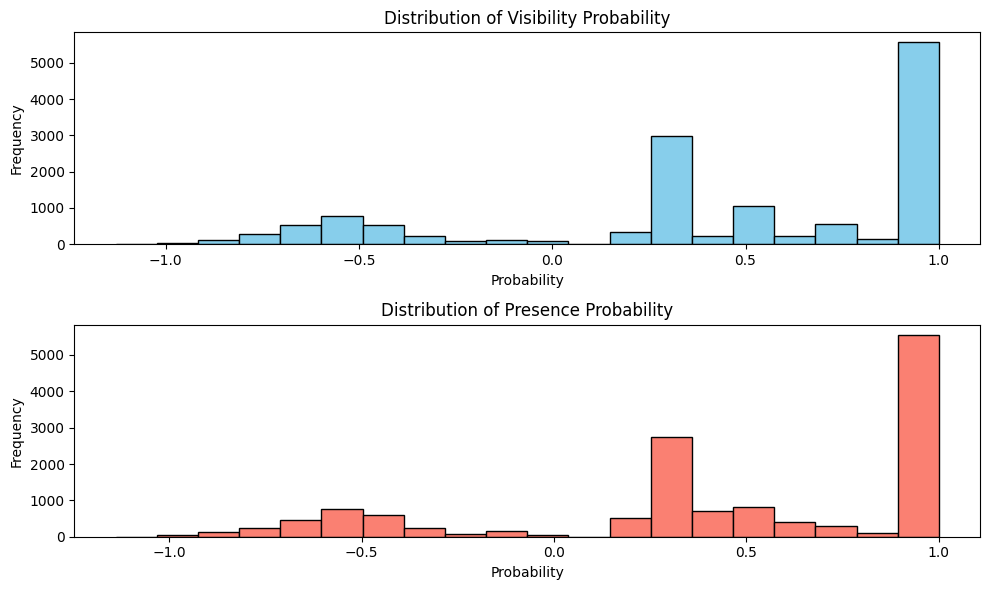

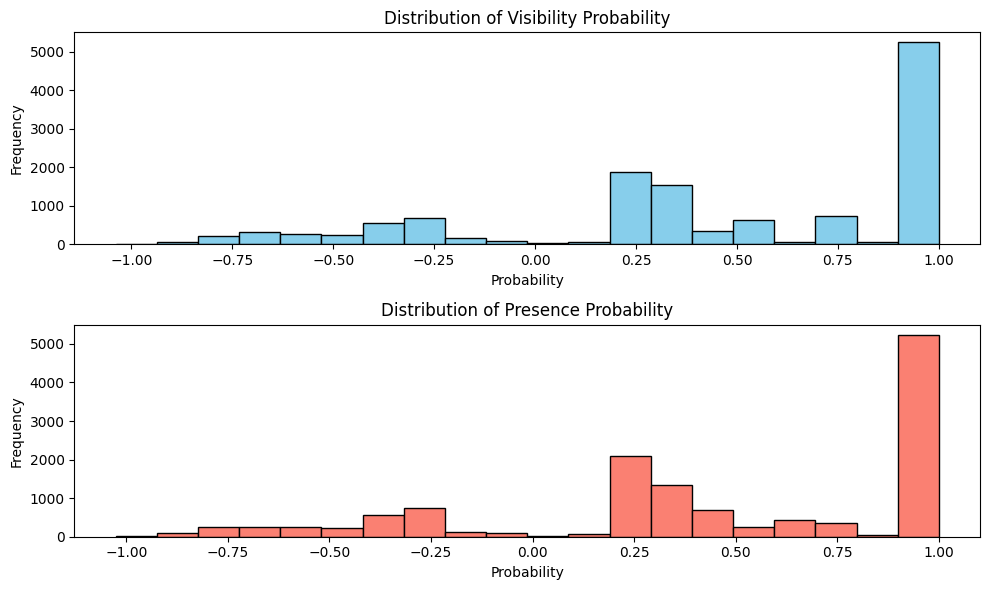

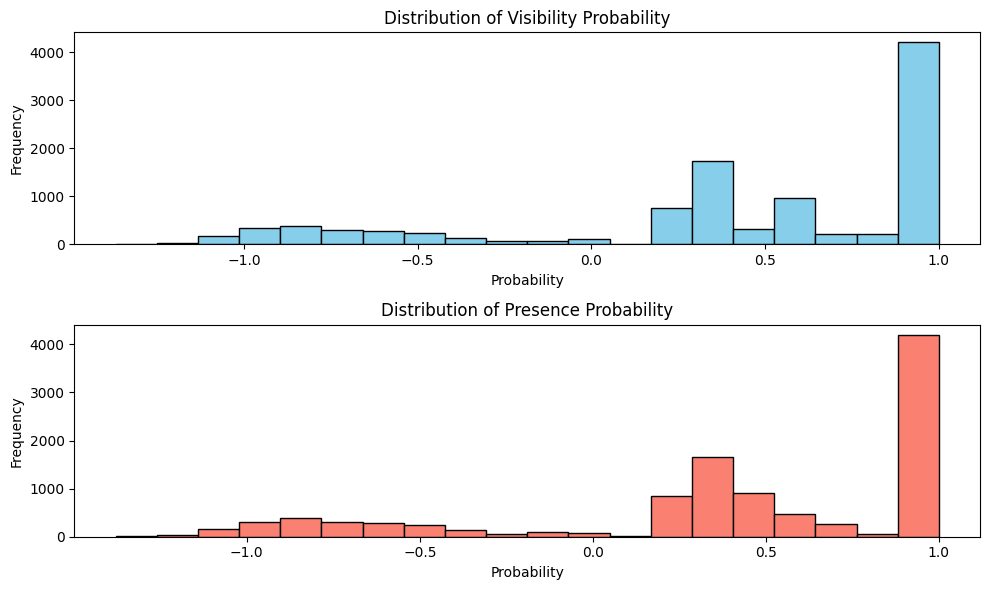

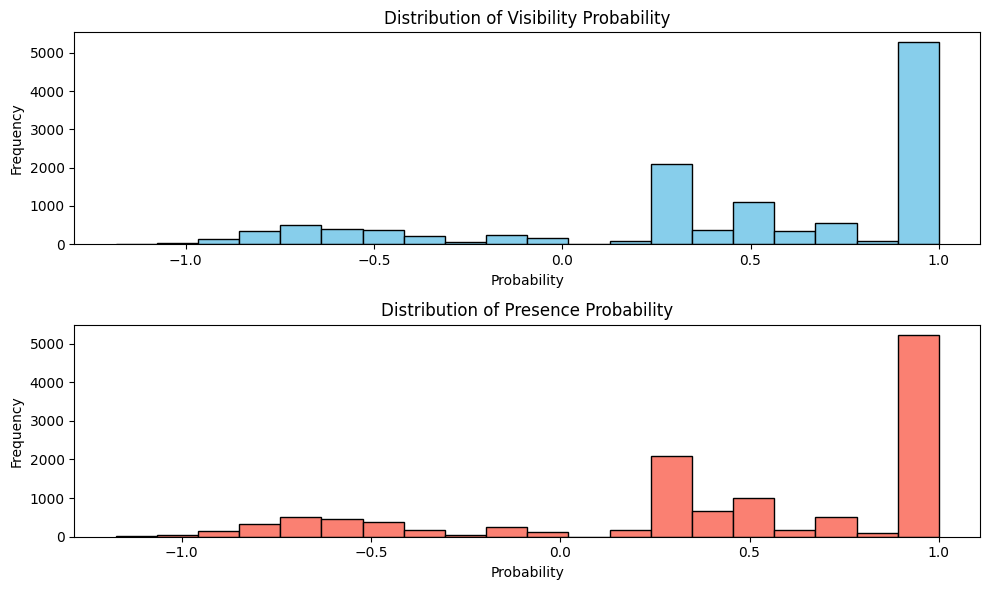

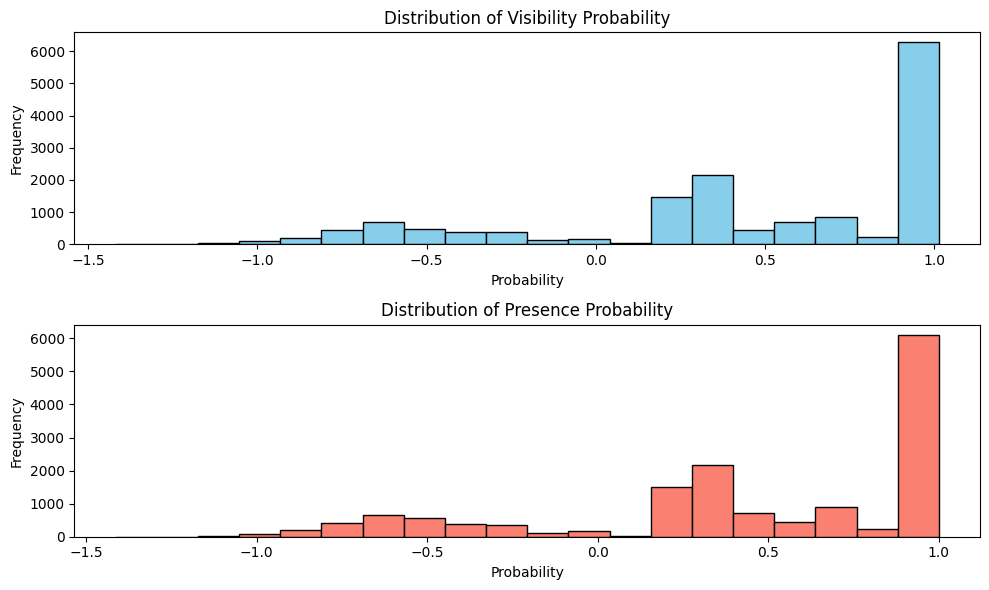

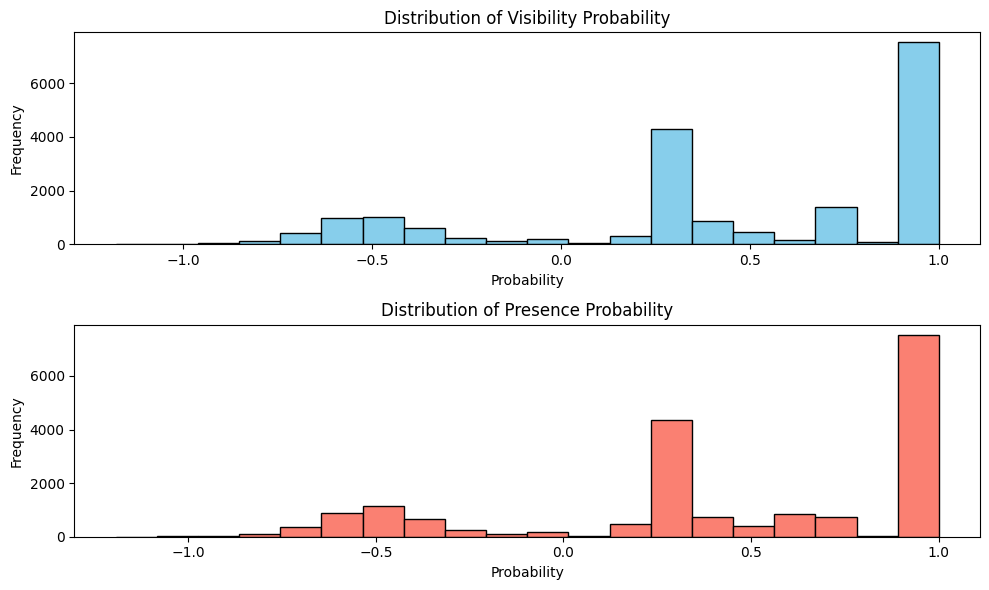

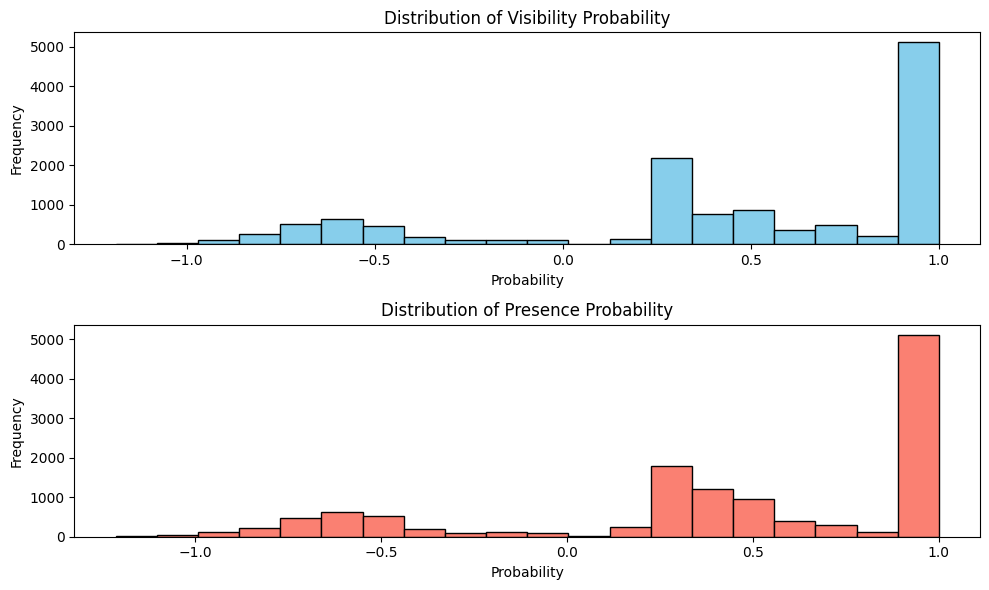

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the current directory and the processed directory
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
processed_dir = os.path.join(parent_dir, 'processed')
output_dir = os.path.join(parent_dir, 'output')

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Get the list of pickle files in the processed directory
pklfiles = [f for f in os.listdir(processed_dir) if f.endswith('.pkl')]

# Dictionary to store summary statistics for each file
summary_stats = {}

for pklfile in pklfiles:
    data = pd.read_pickle(os.path.join(processed_dir, pklfile))

    data = data.sort_values(by='filename')

    visibility_prob = []
    presence_prob = []

    for pose_info in data['poses']:
        for pose in pose_info:
            # Append the visibility and presence probabilities for each pose
            visibility_prob.append(pose[3])
            presence_prob.append(pose[4])

    # Flatten the arrays to make them one-dimensional
    visibility_prob = np.array(visibility_prob).flatten()
    presence_prob = np.array(presence_prob).flatten()

    # Compute Summary Statistics
    visibility_summary = pd.Series(visibility_prob).describe()
    presence_summary = pd.Series(presence_prob).describe()

    # Store summary statistics in the dictionary
    summary_stats[pklfile] = {
        'visibility_mean': visibility_summary['mean'],
        'visibility_std': visibility_summary['std'],
        'presence_mean': presence_summary['mean'],
        'presence_std': presence_summary['std']
    }

    # Step 4: Visualize the Distributions
    plt.figure(figsize=(10, 6))

    # Histogram of visibility probability
    plt.subplot(2, 1, 1)
    plt.hist(visibility_prob, bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribution of Visibility Probability')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')

    # Histogram of presence probability
    plt.subplot(2, 1, 2)
    plt.hist(presence_prob, bins=20, color='salmon', edgecolor='black')
    plt.title('Distribution of Presence Probability')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')

    plt.tight_layout()
    
    # Save the plot as an image file in the output directory
    output_filename = os.path.splitext(pklfile)[0] + '_plot.png'
    output_path = os.path.join(output_dir, output_filename)
    plt.savefig(output_path)
    

# Find the file with the best mean visibility and presence probabilities
best_visibility_mean_file = max(summary_stats, key=lambda x: summary_stats[x]['visibility_mean'])
best_presence_mean_file = max(summary_stats, key=lambda x: summary_stats[x]['presence_mean'])

# Print the results
print("File with the best mean visibility probability:", best_visibility_mean_file)
print("Mean visibility probability:", summary_stats[best_visibility_mean_file]['visibility_mean'])
print("File with the best mean presence probability:", best_presence_mean_file)
print("Mean presence probability:", summary_stats[best_presence_mean_file]['presence_mean'])

